In [17]:
import numpy as np

from astropy.table import QTable
import astropy.units as u

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from Pipe3D_rotation_curve import extract_data, calc_rot_curve
#from DRP_rotation_curve import extract_data, extract_Pipe3d_data, calc_rot_curve
from dark_matter_mass_plottingFunctions import plot_fitted_rot_curve, plot_fitted_rot_curve_mass

## Galaxies to plot

In [18]:
FILE_IDS = ['8997-9102']

IMAGE_DIR = '../spirals/Images/Pipe3D/'
#IMAGE_DIR = '../spirals/Images/DRP/'

FILE_DIR = '../spirals/Pipe3D-rot_curve_data_files/'
#FILE_DIR = '../spirals/DRP-rot_curve_data_files/'

## Read in data

In [19]:
master_table = QTable.read( '../spirals/Pipe3D-master_file_vflag_10.txt', format='ascii.ecsv')
#master_table = QTable.read('../spirals/DRPall-master_file_30.txt', format='ascii.ecsv')

PIPE3D_FOLDER = '../data/MaNGA/MaNGA_DR15/pipe3d/'
#MANGA_FOLDER = '../data/MaNGA/MaNGA_DR16/HYB10-GAU-MILESHC/'

# Create fitted rotation curve plots

In [ ]:
mass_outputs = {'center_flux': 0.2866722 * (u.erg / (u.cm*u.cm*u.s)), 
                'center_flux_error': 0.01388077 * (u.erg / (u.cm*u.cm*u.s)), 
                'frac_masked_spaxels': 0.45486232136632976, 
                'avg_v_max': 272.1956987 * (u.km / u.s), 
                'avg_r_turn': 3.99224811 * u.kpc, 
                'avg_alpha': 1.6526717602899932, 
                'avg_v_max_sigma': 5.11142976 * (u.km / u.s), 
                'avg_r_turn_sigma': 0.09375039 * u.kpc, 
                'avg_alpha_sigma': 0.09640421203575725, 
                'avg_chi_square_rot': 610.828127957773, 
                'avg_chi_square_ndf': 50.90234399648108, 
                'pos_v_max': 305.57920193 * (u.km / u.s), 
                'pos_r_turn': 3.5140512 * u.kpc, 
                'pos_alpha': 1.6734858178965908, 
                'pos_v_max_sigma': 8.04708901 * (u.km / u.s), 
                'pos_r_turn_sigma': 0.17527491 * u.kpc, 
                'pos_alpha_sigma': 0.2135535766356284, 
                'pos_chi_square_rot': 322.5622978498081, 
                'pos_chi_square_ndf': 26.88019148748401, 
                'neg_v_max': 233.47111069 * (u.km / u.s), 
                'neg_r_turn': 3.97037737 * u.kpc, 
                'neg_alpha': 1.6329957675279865, 
                'neg_v_max_sigma': 7.9970786 * (u.km / u.s), 
                'neg_r_turn_sigma': 0.21397714 * u.kpc, 
                'neg_alpha_sigma': 0.21731893602462835, 
                'neg_chi_square_rot': 514.1620264634598, 
                'neg_chi_square_ndf': 42.846835538621654, 
                'Mtot': 3.05178948e+11 * u.solMass, 
                'Mtot_error': 1.6073099e+10 * u.solMass, 
                'Mdark': 2.37181614e+11 * u.solMass, 
                'Mdark_error': 1.6073099e+10 * u.solMass, 
                'Mstar': 6.79973344e+10 * u.solMass, 
                'Mdark_Mstar_ratio': 3.48810164, 
                'Mdark_Mstar_ratio_error': 0.23637837, 
                'curve_used': 'pos', 
                'points_cut': 0}

[184.49300933] km / s -20.277786254882812


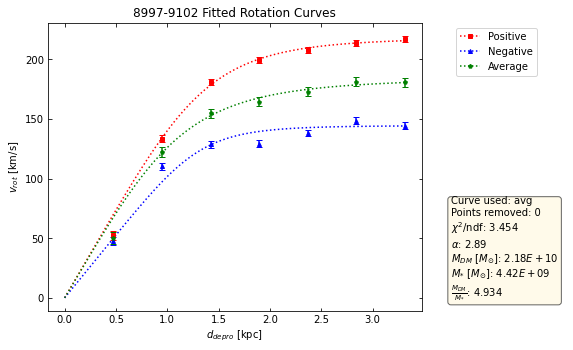

In [20]:
%matplotlib inline

for i in range(len(FILE_IDS)):

    #######################################################################
    # Find galaxy in master_table
    #----------------------------------------------------------------------
    plate, IFU = FILE_IDS[i].split('-')

    plate_boolean = master_table['MaNGA_plate'] == int(plate)
    IFU_boolean = master_table['MaNGA_IFU'] == int(IFU)

    row = master_table[plate_boolean & IFU_boolean]

    print(row['avg_v_max'], row['rabsmag'][0])
    #----------------------------------------------------------------------


    #######################################################################
    # Plot fitted rotation curve
    #----------------------------------------------------------------------
    plot_fitted_rot_curve( FILE_IDS[i], row[0], FILE_DIR)
    #plot_fitted_rot_curve( FILE_IDS[i], row[0], FILE_DIR)
    #----------------------------------------------------------------------

# Create fitted rotation curve plot with DM, $M_*$ curves

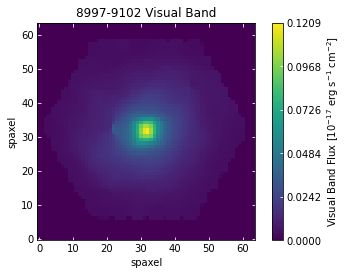

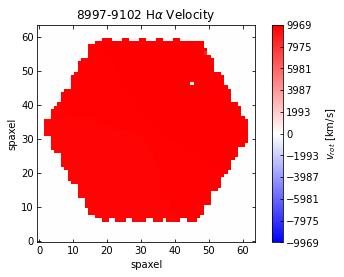

ALL DATA POINTS IN 3.788025046337752 kpc ANNULUS ARE MASKED!!!
ALL DATA POINTS IN 4.261528177129971 kpc ANNULUS ARE MASKED!!!
ALL DATA POINTS IN 4.73503130792219 kpc ANNULUS ARE MASKED!!!
ALL DATA POINTS IN 5.208534438714409 kpc ANNULUS ARE MASKED!!!
ALL DATA POINTS IN 5.682037569506628 kpc ANNULUS ARE MASKED!!!
ALL DATA POINTS IN 6.155540700298847 kpc ANNULUS ARE MASKED!!!


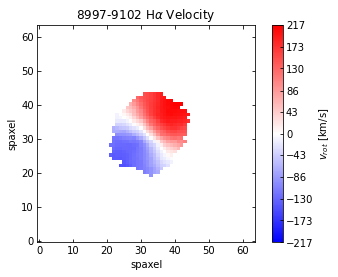

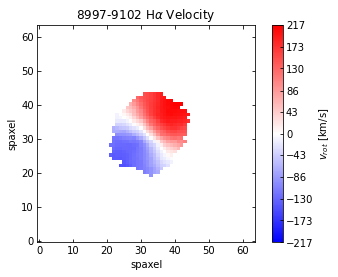

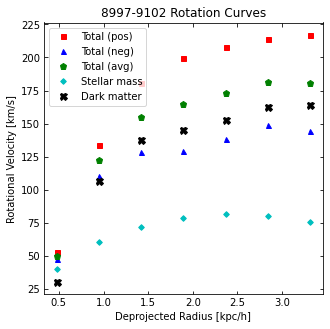

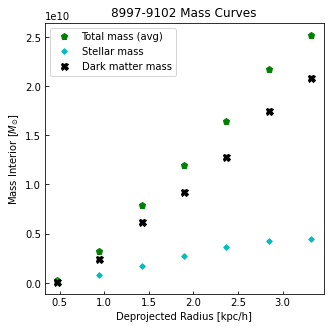

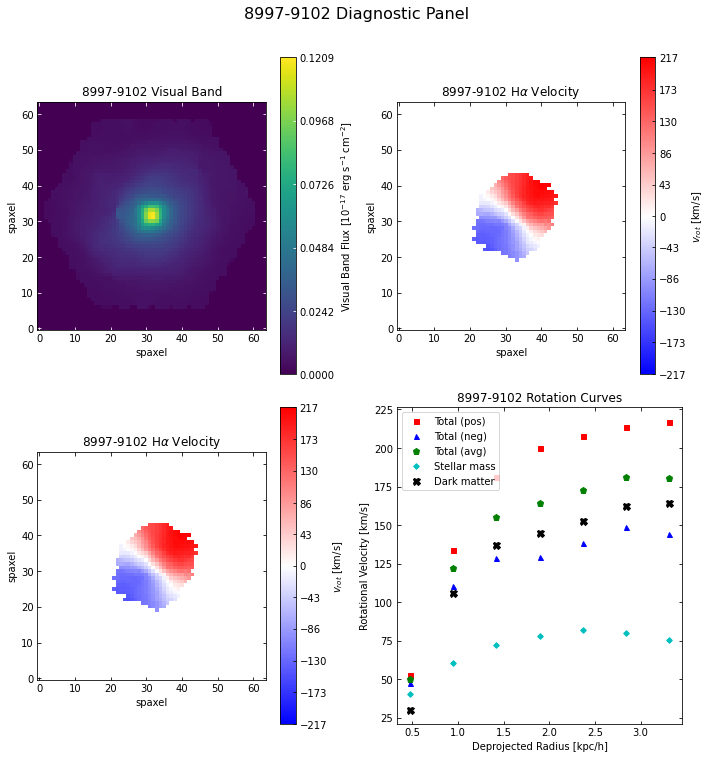

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


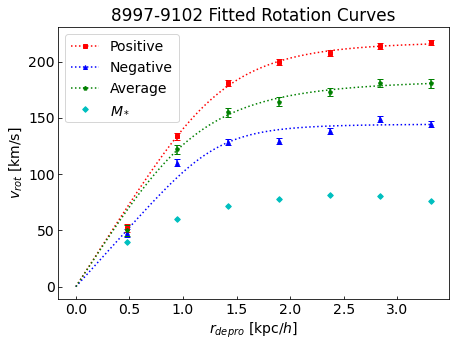

In [21]:
%matplotlib inline

for i in range(len(FILE_IDS)):

    ############################################################################
    # Construct galaxy file name
    #---------------------------------------------------------------------------
    plate, IFU = FILE_IDS[i].split('-')

    #file_name = MANGA_FOLDER + plate + '/manga-' + FILE_IDS[i] + '-MAPS-HYB10-GAU-MILESHC.fits.gz'
    file_name = PIPE3D_FOLDER + plate + '/manga-' + FILE_IDS[i] + '.Pipe3D.cube.fits.gz'
    #---------------------------------------------------------------------------


    ############################################################################
    # Read data from fits file
    #---------------------------------------------------------------------------
    _,_,Ha_vel, Ha_vel_error, v_band, v_band_err, sMass_density,_,_ = extract_data( file_name)
    #Ha_vel, Ha_vel_ivar, Ha_vel_mask, r_band, r_band_ivar = extract_data( file_name)
    #sMass_density = extract_Pipe3d_data( PIPE3D_FOLDER, FILE_IDS[i])
    #---------------------------------------------------------------------------


    ############################################################################
    # Find galaxy in master_table
    #---------------------------------------------------------------------------
    plate_boolean = master_table['MaNGA_plate'] == int(plate)
    IFU_boolean = master_table['MaNGA_IFU'] == int(IFU)
    #IFU_boolean = master_table['MaNGA_fiberID'] == int(IFU)

    row = master_table[plate_boolean & IFU_boolean]
    #print( row['redshift'][0])
    #print( row['NSA_redshift'][0])
    #---------------------------------------------------------------------------


    ############################################################################
    # Extract rotation curve data
    #---------------------------------------------------------------------------
    '''
    rot_data_table,_,_ = calc_rot_curve( Ha_vel, Ha_vel_ivar, Ha_vel_mask,
                                         r_band, r_band_ivar,
                                         sMass_density,
                                         row['ba'][0], row['phi'][0], 
                                         row['redshift'][0], FILE_IDS[i])
    '''
    rot_data_table,_,_ = calc_rot_curve( Ha_vel, Ha_vel_error, v_band, 
                                         v_band_err, sMass_density, 
                                         row['NSA_ba'][0], row['NSA_phi'][0], 
                                         row['NSA_redshift'][0], FILE_IDS[i]
                                         #plot_diagnostics=False
                                       )
    
    #---------------------------------------------------------------------------


    ############################################################################
    # Plot fitted rotation curve
    #---------------------------------------------------------------------------
    plot_fitted_rot_curve_mass( FILE_IDS[i], row[0], rot_data_table, FILE_DIR, 
                                DM_plot=False, IMAGE_DIR=IMAGE_DIR
                              )
    #---------------------------------------------------------------------------